Підготовчий етап

In [1]:
import pandas as pd

# Завантаження даних
data = pd.read_csv('onlinefoods.csv')

# Перевірка перших декількох рядків
print(data.head())

# Інформація про структуру даних
print(data.info())


   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

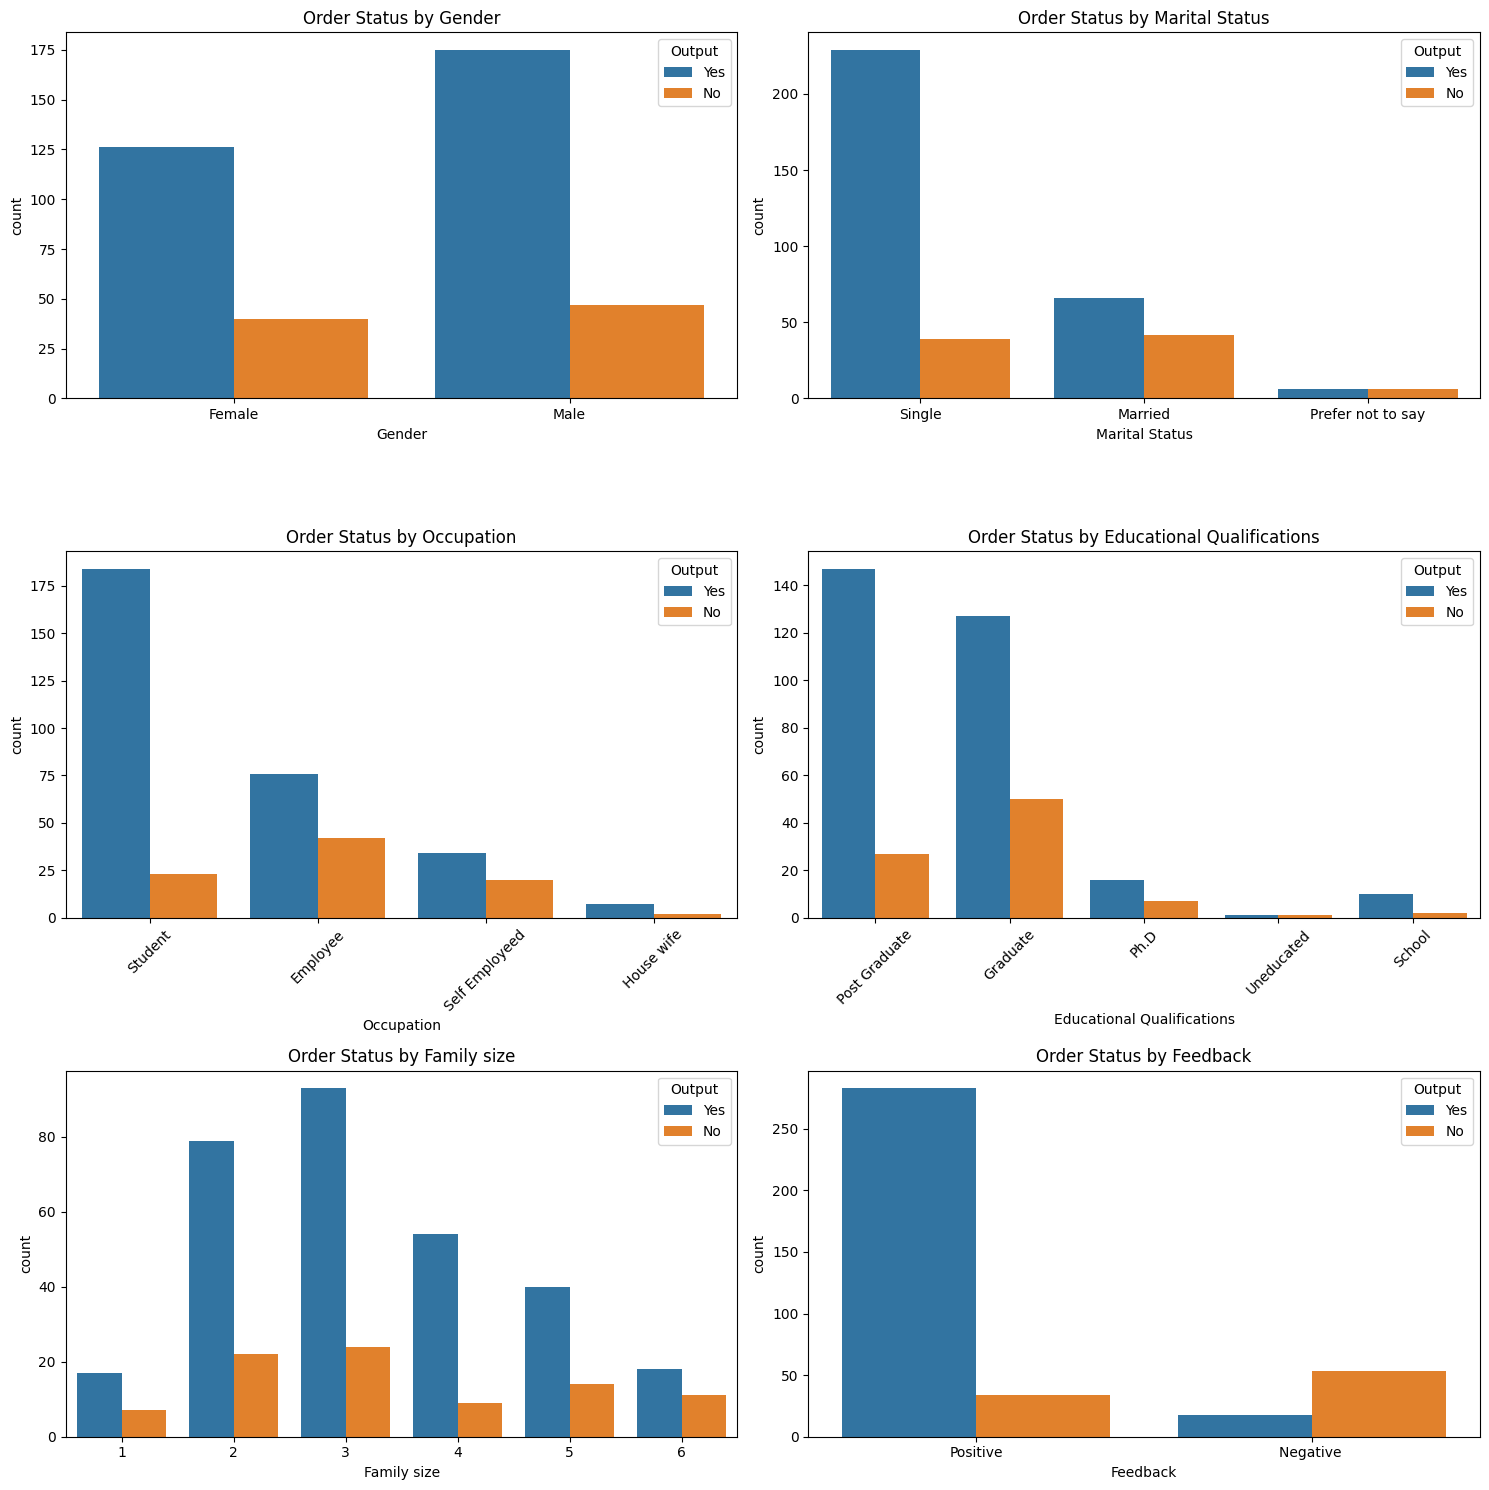

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Візуалізація залежностей між  входами та виходоми
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Статистика успішних та невдало виконаних замовлень за стать
sns.countplot(x='Gender', hue='Output', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Order Status by Gender')

# Статистика успішних та невдало виконаних замовлень за сімейний стан
sns.countplot(x='Marital Status', hue='Output', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Order Status by Marital Status')

# Статистика успішних та невдало виконаних замовлень за заняття
sns.countplot(x='Occupation', hue='Output', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Order Status by Occupation')
axes[1, 0].tick_params(axis='x', rotation=45)

# Статистика успішних та невдало виконаних замовлень за освітнім рівнем
sns.countplot(x='Educational Qualifications', hue='Output', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Order Status by Educational Qualifications')
axes[1, 1].tick_params(axis='x', rotation=45)

# Статистика успішних та невдало виконаних замовлень за розміром сім'ї
sns.countplot(x='Family size', hue='Output', data=data, ax=axes[2, 0])
axes[2, 0].set_title('Order Status by Family size')

# Відгуки за категоріями
sns.countplot(x='Feedback', hue='Output', data=data, ax=axes[2, 1])
axes[2, 1].set_title('Order Status by Feedback')

plt.tight_layout()
plt.show()


In [8]:
import pandas as pd

# Завантаження даних
data = pd.read_csv('onlinefoods.csv')

# Перевірка пропущених значень
missing_values = data.isnull().sum()
print("Пропущені значення:")
print(missing_values)

# Аналіз аномалій у числових стовпцях
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
print("\nСтатистика числових стовпців:")
print(data[numeric_columns].describe())

# Аналіз унікальних значень у категоріальних стовпцях
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nУнікальні значення категоріальних стовпців:")
for col in categorical_columns:
    print(f"{col}: {data[col].unique()}")


Пропущені значення:
Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

Статистика числових стовпців:
              Age  Family size    latitude   longitude       Pin code
count  388.000000   388.000000  388.000000  388.000000     388.000000
mean    24.628866     3.280928   12.972058   77.600160  560040.113402
std      2.975593     1.351025    0.044489    0.051354      31.399609
min     18.000000     1.000000   12.865200   77.484200  560001.000000
25%     23.000000     2.000000   12.936900   77.565275  560010.750000
50%     24.000000     3.000000   12.977000   77.592100  560033.500000
75%     26.000000     4.000000

Кореляційна матриця:
                  Age  Family size  latitude  longitude  Pin code
Age          1.000000     0.169982  0.006595   0.047500  0.137294
Family size  0.169982     1.000000 -0.053537   0.070126 -0.009402
latitude     0.006595    -0.053537  1.000000  -0.144234 -0.201813
longitude    0.047500     0.070126 -0.144234   1.000000  0.156119
Pin code     0.137294    -0.009402 -0.201813   0.156119  1.000000


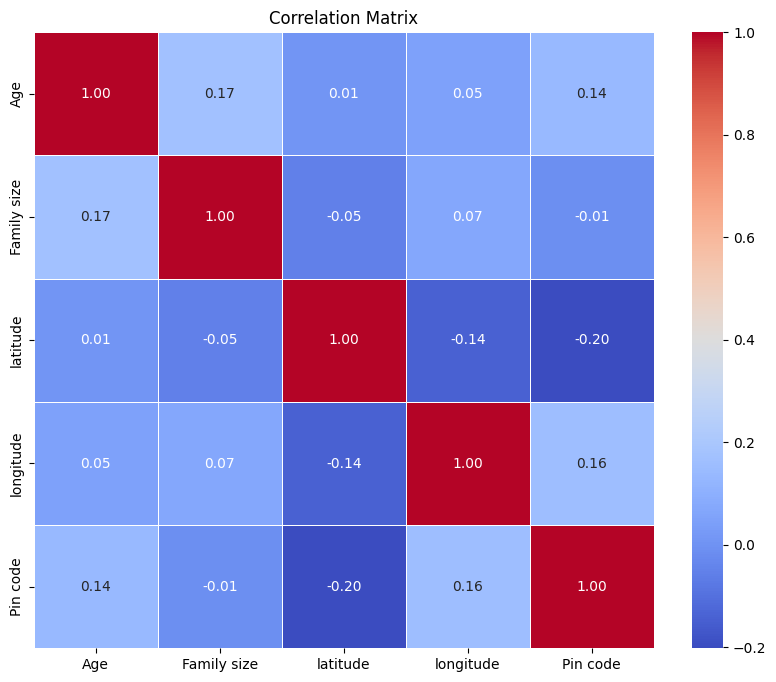

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Завантаження даних
data = pd.read_csv('onlinefoods.csv')

# Вибір числових змінних для кореляційного аналізу
numeric_cols = ['Age', 'Family size', 'latitude', 'longitude', 'Pin code']

# Матриця кореляції
corr_matrix = data[numeric_cols].corr()
# Виведення кореляційної матриці
print("Кореляційна матриця:")
print(corr_matrix)


# Візуалізація кореляційної матриці  за допомогою теплової карти
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# Завантаження даних
data = pd.read_csv('onlinefoods.csv')

# Обробка пропущених значень для числових змінних
numerical_cols = ['Age', 'Family size', 'latitude', 'longitude', 'Pin code']
imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

# Кодування категоріальних змінних
categorical_cols = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Output', 'Feedback']
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# One-Hot Encoding для категоріальних змінних
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_cols = pd.DataFrame(onehot_encoder.fit_transform(data[categorical_cols]))

# Масштабування числових змінних
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Видалення зайвих стовпців (якщо потрібно)
unnecessary_cols = ['Unnamed: 12']  # якщо це зайвий стовпець
data.drop(columns=unnecessary_cols, inplace=True)

# Розділення даних на навчальну та тестову вибірки
X = data.drop(columns=['Age'])  # Особливості
y = data['Age']  # Цільова змінна

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Вивід розмірів навчальної та тестової вибірок
print(data)
print("Розміри навчальної вибірки:", X_train.shape, y_train.shape)
print("Розміри тестової вибірки:", X_test.shape, y_test.shape)



          Age  Gender  Marital Status  Occupation  Monthly Income  \
0   -1.557620       0               2           3               4   
1   -0.211614       0               2           3               2   
2   -0.884617       1               2           3               2   
3   -0.884617       0               2           3               4   
4   -0.884617       1               2           3               2   
..        ...     ...             ...         ...             ...   
383 -0.548116       0               2           3               4   
384 -0.548116       0               2           3               4   
385 -0.884617       0               2           3               4   
386 -0.548116       1               2           3               2   
387 -0.548116       1               2           3               4   

     Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                             2     0.532929  0.102224  -0.016759 -1.247274   
1            

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Виконання завдання

Найбільш корельована змінна з цільовою змінною: Family size
Коефіцієнт навчання (slope): 0.37437927574569
Зсув (intercept): 23.400554592720972


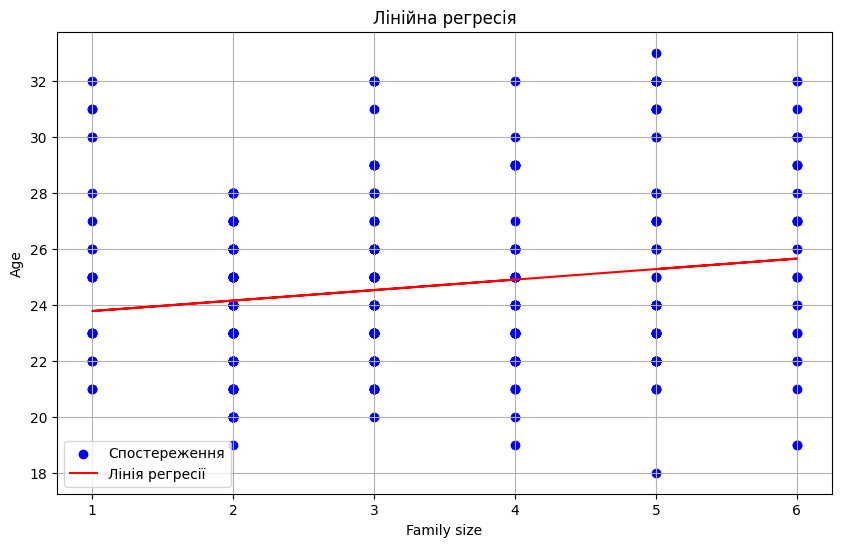

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Завантаження даних
data = pd.read_csv('onlinefoods.csv')

# Відфільтруйте лише числові стовпці
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Вибір цільової змінної
target_variable = 'Age'

# Знаходимо кореляції між цільовою змінною та іншими змінними
correlation_with_target = numeric_data.corr()[target_variable].abs().sort_values(ascending=False)
most_correlated_variable = correlation_with_target.index[1]

# Друкуємо найбільш корельовану змінну
print("Найбільш корельована змінна з цільовою змінною:", most_correlated_variable)

# Вибірка змінних
X = data[[most_correlated_variable]]
y = data[target_variable]

# Побудова моделі лінійної регресії
model = LinearRegression()
model.fit(X, y)

# Виведення результатів
print("Коефіцієнт навчання (slope):", model.coef_[0])
print("Зсув (intercept):", model.intercept_)

# Візуалізація лінійної регресії
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Спостереження')  # Відобразимо спостереження
plt.plot(X, model.predict(X), color='red', label='Лінія регресії')  # Відобразимо лінію регресії
plt.title('Лінійна регресія')
plt.xlabel(most_correlated_variable)
plt.ylabel(target_variable)
plt.legend()
plt.grid(True)
plt.show()



Друга за значенням кореляція змінна з цільовою змінною: Family size
Середньоквадратична помилка поліноміальної регресії: 8.841012095493227
Середньоквадратична помилка для регуляризації Рідж: 8.825399416780792
Середньоквадратична помилка для регуляризації Лассо: 8.200086443119782


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


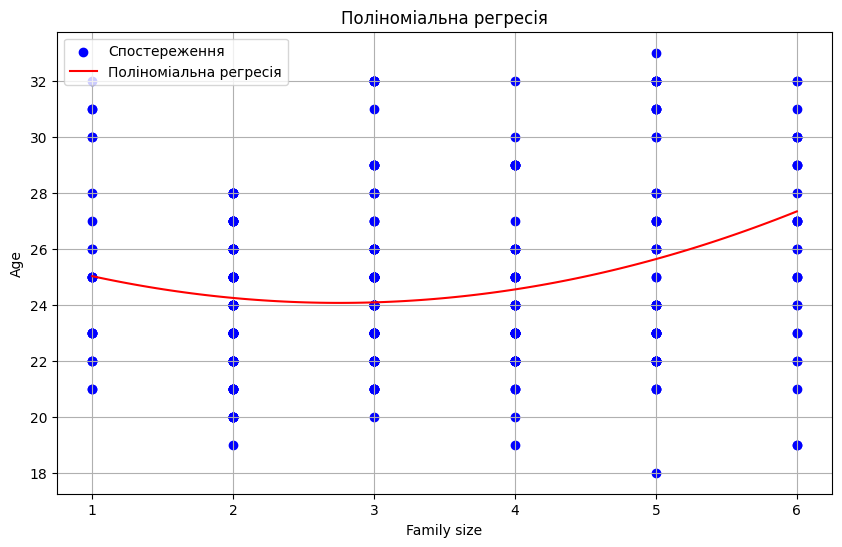

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Завантаження даних
data = pd.read_csv('onlinefoods.csv')

# Відфільтрувати числові стовпці
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Вибір цільової змінної
target_variable = 'Age'

# Знаходимо кореляції між цільовою змінною та іншими змінними
correlation_with_target = numeric_data.corr()[target_variable].abs().sort_values(ascending=False)
second_most_correlated_variable = correlation_with_target.index[1]

# Друкуємо другу за значенням кореляцію змінну
print("Друга за значенням кореляція змінна з цільовою змінною:", second_most_correlated_variable)

# Вибірка змінних
X = data[[second_most_correlated_variable]]
y = data[target_variable]

# Розділення даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Побудова поліноміальних ознак
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Побудова поліноміальної регресії
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Предикція на тестовому наборі
y_pred_poly = poly_model.predict(X_poly_test)

# Виведення середньоквадратичної помилки поліноміальної регресії
print("Середньоквадратична помилка поліноміальної регресії:", mean_squared_error(y_test, y_pred_poly))

# Регуляризація за допомогою методу Рідж
ridge_model = Ridge(alpha=0.5)  # Значення alpha можна змінювати
ridge_model.fit(X_poly_train, y_train)

# Предикція на тестовому наборі з регуляризацією Рідж
y_pred_ridge = ridge_model.predict(X_poly_test)

# Виведення середньоквадратичної помилки для регуляризації Рідж
print("Середньоквадратична помилка для регуляризації Рідж:", mean_squared_error(y_test, y_pred_ridge))

# Регуляризація за допомогою методу Лассо
lasso_model = Lasso(alpha=0.5)  # Значення alpha можна змінювати
lasso_model.fit(X_poly_train, y_train)

# Предикція на тестовому наборі з регуляризацією Лассо
y_pred_lasso = lasso_model.predict(X_poly_test)

# Виведення середньоквадратичної помилки для регуляризації Лассо
print("Середньоквадратична помилка для регуляризації Лассо:", mean_squared_error(y_test, y_pred_lasso))

# Генерація значень X для побудови графіку
X_values = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_poly_values = poly_features.transform(X_values)

# Предикція на генерованих значеннях X
y_poly_values = poly_model.predict(X_poly_values)

# Побудова графіку поліноміальної регресії
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Спостереження')  # Відобразимо спостереження
plt.plot(X_values, y_poly_values, color='red', label='Поліноміальна регресія')  # Відобразимо поліноміальну регресію
plt.title('Поліноміальна регресія')
plt.xlabel(second_most_correlated_variable)
plt.ylabel(target_variable)
plt.legend()
plt.grid(True)
plt.show()



Середньоквадратична помилка для багатопараметричної регресії з регуляризацією Рідж: 8.79236961816193


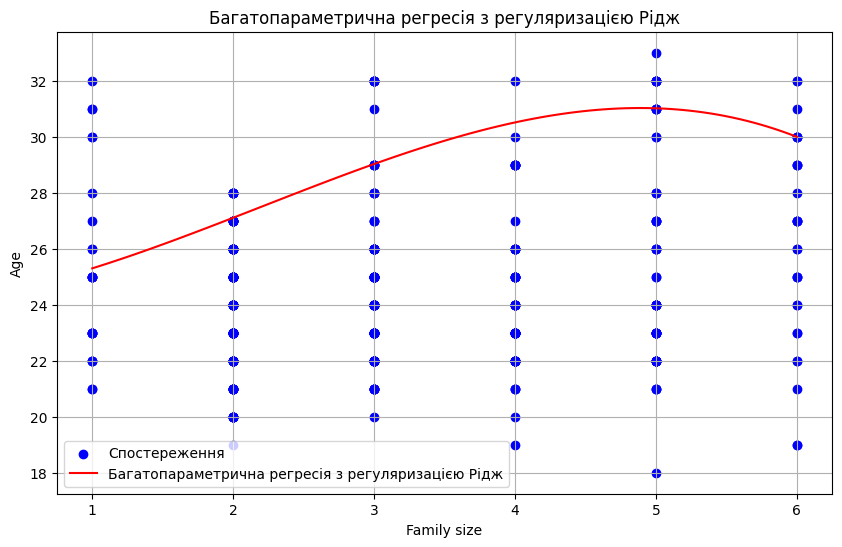

In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Визначення степеня поліномів
degree = 3

# Побудова моделі багатопараметричної регресії з регуляризацією (метод Рідж)
ridge_model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=0.5))  # Значення alpha можна змінювати

# Навчання моделі
ridge_model.fit(X_train, y_train)

# Предикція на тестовому наборі
y_pred_ridge = ridge_model.predict(X_test)

# Виведення середньоквадратичної помилки для багатопараметричної регресії з регуляризацією Рідж
print("Середньоквадратична помилка для багатопараметричної регресії з регуляризацією Рідж:", mean_squared_error(y_test, y_pred_ridge))

# Генерація значень X для побудови графіку
X_values = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_values_ridge = ridge_model.predict(X_values)

# Побудова графіку багатопараметричної регресії з регуляризацією Рідж
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Спостереження')  # Відобразимо спостереження
plt.plot(X_values, y_values_ridge, color='red', label='Багатопараметрична регресія з регуляризацією Рідж')  # Відобразимо багатопараметричну регресію
plt.title('Багатопараметрична регресія з регуляризацією Рідж')
plt.xlabel(second_most_correlated_variable)
plt.ylabel(target_variable)
plt.legend()
plt.grid(True)
plt.show()



Аналіз результатів

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Середньоквадратична помилка на навчальній вибірці для лінійної регресії: 10.578756487911416
Середньоквадратична помилка на тестовій вибірці для лінійної регресії: 8.207247713441209
Середньоквадратична помилка на навчальній вибірці для багатопараметричної регресії з регуляризацією Рідж: 8.365418928442887
Середньоквадратична помилка на тестовій вибірці для багатопараметричної регресії з регуляризацією Рідж: 8.79236961816193


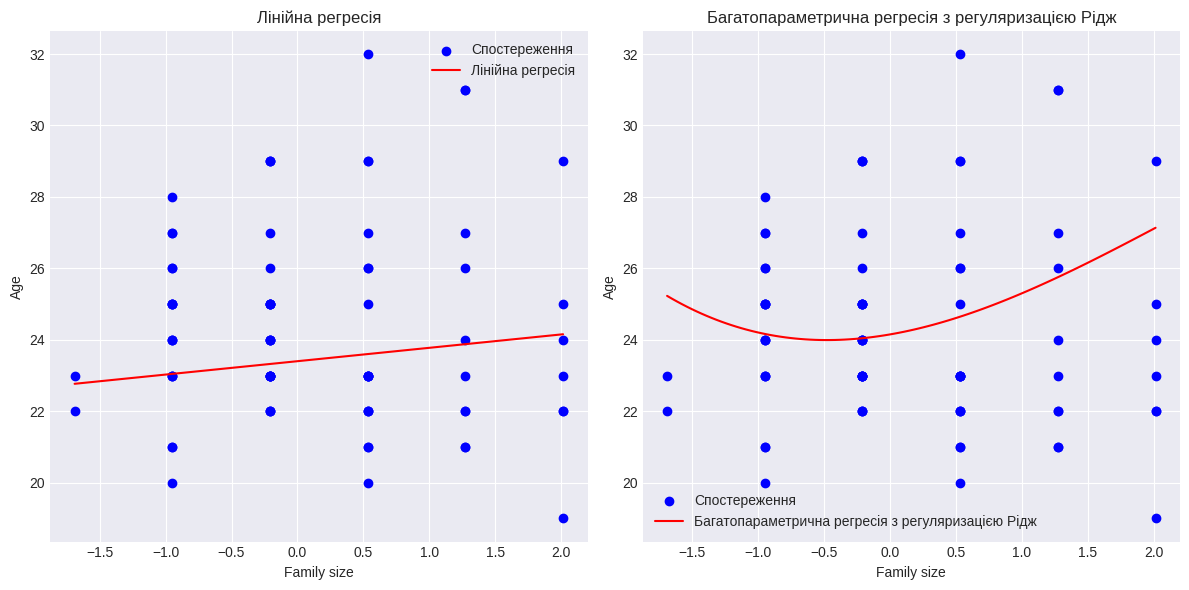

In [62]:
 # Оцінка помилок на навчальній та тестовій вибірках для кожної моделі
linear_train_error = mean_squared_error(y_train, model.predict(X_train))
linear_test_error = mean_squared_error(y_test, model.predict(X_test))
ridge_train_error = mean_squared_error(y_train, ridge_model.predict(X_train))
ridge_test_error = mean_squared_error(y_test, y_pred_ridge)

print("Середньоквадратична помилка на навчальній вибірці для лінійної регресії:", linear_train_error)
print("Середньоквадратична помилка на тестовій вибірці для лінійної регресії:", linear_test_error)
print("Середньоквадратична помилка на навчальній вибірці для багатопараметричної регресії з регуляризацією Рідж:", ridge_train_error)
print("Середньоквадратична помилка на тестовій вибірці для багатопараметричної регресії з регуляризацією Рідж:", ridge_test_error)

# Генерація X_values для побудови графіків
X_values = np.linspace(np.min(X_test), np.max(X_test), 100).reshape(-1, 1)

# Передбачення відповідних значень за моделлю лінійної регресії
y_values_linear = model.predict(X_values)

# Передбачення відповідних значень за моделлю регресії з регуляризацією Рідж
y_values_ridge = ridge_model.predict(X_values)

# Побудова графіків розсіювання
plt.figure(figsize=(12, 6))

# Графік для лінійної регресії
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Спостереження')
plt.plot(X_values, y_values_linear, color='red', label='Лінійна регресія')
plt.title('Лінійна регресія')
plt.xlabel(second_most_correlated_variable)
plt.ylabel(target_variable)
plt.legend()

# Графік для багатопараметричної регресії з регуляризацією Рідж
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Спостереження')
plt.plot(X_values, y_values_ridge, color='red', label='Багатопараметрична регресія з регуляризацією Рідж')
plt.title('Багатопараметрична регресія з регуляризацією Рідж')
plt.xlabel(second_most_correlated_variable)
plt.ylabel(target_variable)
plt.legend()

plt.tight_layout()
plt.show()
